# <center>M2 DAC -   Reinforcement Learning & Advanced Deep</center>
##  <center> TME 9. Generative Adversarial Networks  </center>

Ce TME a pour objectif d'expérimenter les Generative Adversarial Networks (GANs) sur un problème de génération de visages. 

De manière classique, un GAN se formule selon un problème adverse de la manière suivante: 
$$\min\limits_{G} \max\limits_D V(D,G) = \mathbb{E}_{x\sim p_{data}(x)}\big[logD(x)\big] + \mathbb{E}_{z\sim p_{z}(z)}\big[log(1-D(G(z)))\big]$$
Cette formulation met en jeu deux réseaux adverse: 
*   Un réseau discriminateur $D$, dont l'objectif est de savoir distinguer les données réelles des données simulées  
*   Un réseau générateur $G$, dont l'objectif est de flouer le discriminateur

À l'optimum, avec des réseaux de capacité infinie, la distribution $p_G$ des données générées par $G$ est prouvée suivre la distribution des données réelles $p_{data}$. Bien sûr nous ne travaillons pas avec des réseaux de capacité infinie (et d'ailleurs heureusement car on ne veut pas apprendre par coeur les données d'apprentissage), mais l'objectif est d'approcher cette distribution $p_{data}$ en apprenant un générateur neuronal dont les sorties sont difficilement distinguables des vraies données pour le discriminateur. 

Nous proposons de mettre ce genre d'architecture pour un la génération de visages: selon un ensemble de visages d'entraînement, il s'agit d'apprendre à générer des visages qui paraissent les plus réalistes possibles tout en conservant une certaine diversité dans les distributions de sortie. Pour cela nous emploierons une architecture DCGAN, qui utilise des réseaux de neurones convolutionnels (CNNs) pour le générateur et le discriminateur.    


 



Pour ce TP, nous vous proposons de travailler avec Google Colab qui est un service notebook en ligne avec ressources machines à disposition (nécessite d'être connecté à un compte google personnel):
*   https://colab.research.google.com/
*   Ouvrir ce Notebook avec "File>Upload Notebook"
*   Sélectionner un Runtime GPU : Runtime>Change Runtime Type (utile de le faire avant tout téléchargement de données car le changement de Runtime efface les données temporaires de la session)

Pour télécharger les données utiles au TP: 


*   Aller à l'adresse : https://drive.google.com/open?id=0B7EVK8r0v71pWEZsZE9oNnFzTm8
*   Clic-droit sur CelebA, Ajouter à mon Drive
*   Exécuter le code ci-dessous (une autorisation vous sera demandée, suivre le lien donné à l'exécution pour obtenir le code d'authentification)

(Sinon vous pouvez aussi travailler en local en téléchargeant les données sur votre ordinateur mais attention fichier volumineux et colab propose des ressources GPU utiles à la résolution du TP)

Vous devez maintenant avoir dans le paneau de gauche un onglet Files contenant un répertoire drive dans l'arborescence. C'est votre espace de stockage Google Drive. Il devrait contenir un répertoire CelebA (si ce n'est pas le cas attendre un peu et rafraichir, il peut mettre un certain temps à apparaître). 

Il s'agit maintenant de décompresser l'archive téléchargée (cela peut prendre jusqu'à une dizaine de minutes): 



Cela produit un répertoire data à la racine du repertoire temporaire de votre Google Colab. Ce repertoire contient un sous-repertoire img_align_celeba contenant une liste de 202599 fichiers jpg correspondant à des photos de visages de célébrités (attention ce repertoire est temporaire, tout ce qui n'est pas dans un drive est effacé à la fin de la session). 



Le code ci-dessous permet de déclarer la manière de charger les données. 

Lorsque des données sont demandées (pour la construction d'un nouveau batch par exemple), une série de transformations est appliquée sur les images, selon la composition de transformateurs déclarée pour le chargement: 
*    redimentionnement des images en 64 par 64
*    recadrage au centre (qui ne fait rien ici car image déjà dans la taille du cadre mais si utile pour d'autres paramètres)
*    conversion en tenseur pytorch 
*    normalisation des valeurs RGB selon une moyenne de 0.5 et un ecart-type de 0.5.



Donner la procédure d'entraînement de ces deux réseaux. L'optimisation se fera ADAM selon les deux coûts adverses du discriminateur et du générateur. Pour chaque nouveau batch d'images, on alterne les deux mises à jour suivantes, selon un batch de vecteurs $z$ tirés aléatoirement selon une loi normale centrée réduite (un nouveau batch de $z$ à chaque itération): 

1.   Un pas de gradient sur les paramètres du réseau D pour maximiser:  $log(D(x)) + log(1 - D(G(z)))$
2.   Un pas de gradient sur les paramètres du réseau G pour maximiser:  $log(D(G(z)))$ 

3.   $D = \frac{p_{data}(x)}{p_{data}(x) + p_{gen}(x)}$ best is $\frac{1}{2}$, if generated date is the same as original data.


Afin de suivre l'évolution de l'apprentissage, on pourra logguer l'erreur du discriminateur relevée en 1, l'erreur du générateur relevée en 2, la moyenne des sorties du discriminateur sur les images réelles et la moyenne des sorties du discriminateur sur les images générées.

À la fin de chaque époque (i.e., lorsque l'on a itéré sur tous les batchs du DataLoader), on pourra enregistrer les images générées à partir d'un batch de vecteurs $z$ fixe dans le Google Drive pour observer l'évolution des capacités du générateur.  



Le code ci-dessous applique votre réseau à un batch de $z$ aléatoires et affiche les images générées (et enregistre dans fake.png). 

Le générateur du papier original DCGAN possède en fait l'architecture suivante: 

![Generator](https://pytorch.org/tutorials/_images/dcgan_generator.png)

Comme le réseau $G$ définit plus haut, il correspond à un empilement de couches de convolutions transposées (appelée dans certains papiers couches de déconvolution). Contrairement aux convolutions classiques qui mènent à une réduction de la taille des sorties, les convolutions transposées agrandissent les cartes de caractéristiques considérées (feature maps). C'est particulièrement adapté pour de la génération d'images à partir d'un code de petite taille (ici $z$). 

 Pour comprendre comment fonctionne la convolution transposée, voici un exemple simple avec une entrée 2 x 2 et un noyau 2 x 2. Chaque élément de l'entrée (4 éléments) est multiplié par le noyau et le résultat est ajouté à la sorte de taille 3 x 3: 

![BasicTransposeConv2D](http://d2l.ai/_images/trans-conv.svg)

Et voici deux animations pour se représenter l'opération d'une manière plus générale. A gauche on utilise un stride de 1, à droite un stride de 2: 

<p align="center">
<img src="https://i.stack.imgur.com/YyCu2.gif">
<img src="https://i.stack.imgur.com/f2RiP.gif">
</p>


Suivant la doc Pytorch de torch.nn.ConvTranspose2d, la hauteur $H_{out}$ et la largeur $W_{out}$ des cartes de sortie du ConvTranspose2d peuvent se calculer de la manière suivante: 

$H_{out}$=($H_{in}$−1)×stride−2×padding+dilation×(kernel_size−1)+output_padding+1

$W_{out}$=($W_{in}$−1)×stride−2×padding+dilation×(kernel_size−1)+output_padding+1


Proposer un nouveau réseau $G$ qui respecte l'architecture du schéma du papier DCGAN et comparer les résultats. On gardera le paramètre de dilation à sa valeur de 1 par défaut mais il est possible de moduler les valeurs de padding et output_padding pour obtenir des sorties de la taille désirée. 


In [1]:
import numpy as np
import torch

import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.utils.data
import torchvision.datasets as dset
import torchvision.utils as vutils
import torch.backends.cudnn as cudnn    

Bonus: Réaliser le même genre d'apprentissage sur le corpus Mnist (Dataloader existant dans torch pour télécharger et charger le corpus)

In [2]:
from torch.utils.data import Dataset
from torchvision import transforms

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5],
                          std=[0.5])
])

MNIST = torchvision.datasets.MNIST('/MNIST',
                                    download=True,
                                    transform=transform
                                  )

data_loader = torch.utils.data.DataLoader(MNIST,
                                          batch_size=64,
                                          shuffle=True
                                          )


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /MNIST/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /MNIST/MNIST/raw


  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /MNIST/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /usr/local/src/pytorch/torch/csrc/utils/tensor_numpy.cpp:174.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


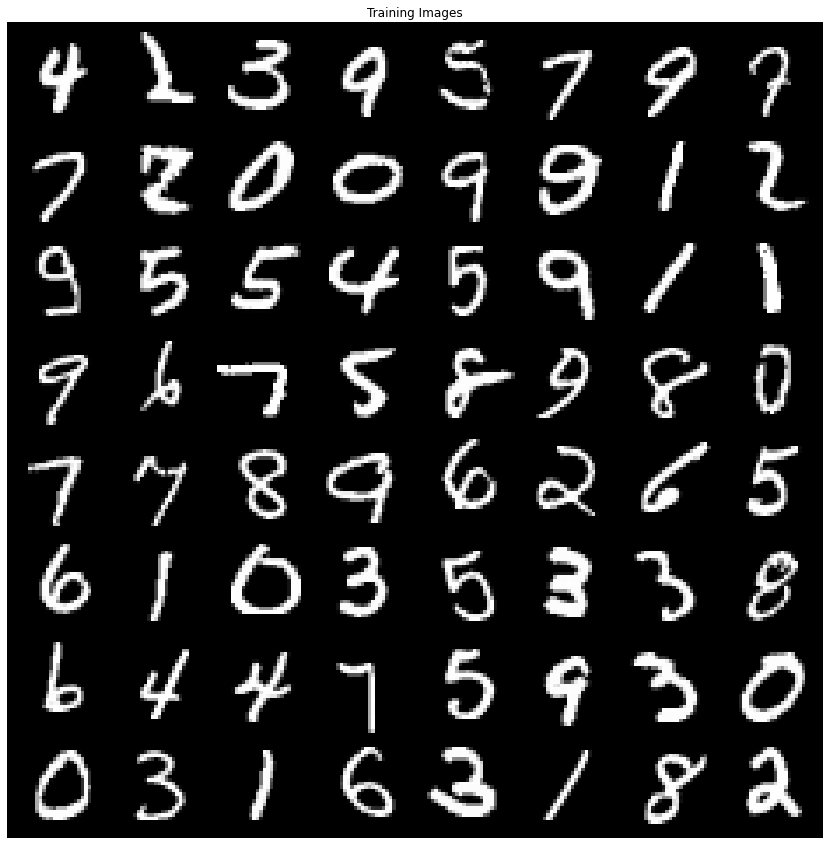

In [3]:
import matplotlib.pyplot as plt
import os
device = torch.device('cuda:0' if torch.cuda.is_available()  else 'cpu')



# Affichage de quelques images
real_batch,_ = next(iter(data_loader)) #real_batch est une liste de 2 tenseurs où le 1er correspond aux images, les second correspond aux labels (ici 0 partout)

plt.figure(figsize=(15,15))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch.to(device)[:64], padding=1, normalize=True).cpu(),(1,2,0)))
os.makedirs("Images",exist_ok=True)
plt.savefig("Images/train.png" ) # Pour sauvegarder l'image sur votre Google Drive 


In [4]:

nc = 1 # Nombre de canaux de l'entrée
ndf = 28 # Facteur du nombre de canaux de sortie des différentes couches de convolution
nz=100

# Initialisation recommandee pour netG et netD dans DCGAN
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 28 x 28
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 14 x 14
            nn.Conv2d(ndf, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 7 x 7
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1,3,1,0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1)


netD = Discriminator().to(device)
netD.apply(weights_init)
print(netD)

nz=100  #Taille du vecteur z donné en entrée du générateur
ngf = 64 # Facteur du nombre de canaux de sortie des différentes couches de deconvolution

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution, size nzx1x1
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf*2, nc, 2, 2, 2, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

        
netG = Generator().to(device)
netG.apply(weights_init)
print(netG)

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 28, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(28, 112, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(112, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(112, 224, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(224, 1, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (9): Sigmoid()
  )
)
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 25

In [5]:
# Initialize BCELoss function
criterion = nn.BCELoss()



# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.


In [6]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [7]:
import math
import itertools
def generate_images(epoch, path, fixed_noise, num_test_samples, netG, device, use_fixed=True):

    z = torch.randn(num_test_samples, 100, 1, 1, device=device)
    size_figure_grid = int(math.sqrt(num_test_samples))
    title = None
  
    if use_fixed:
        generated_fake_images = netG(fixed_noise)
        path += 'fixed_noise_new/'
        title = 'Fixed Noise'
    else:
        generated_fake_images = netG(z)
        path += 'variable_noise/'
        title = 'Variable Noise'
    
    if not os.path.exists(path):
        os.makedirs(path)
    
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(6,6))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
    for k in range(num_test_samples):
        i = k//4
        j = k%4
        ax[i,j].cla()
        ax[i,j].imshow((generated_fake_images[k].cpu().data.numpy().transpose(1, 2, 0) + 1) / 2 )
    label = 'Epoch_{}'.format(epoch+1)
    fig.text(0.5, 0.04, label, ha='center')
    fig.suptitle(title)
    fig.savefig(path+label+'.png')

In [8]:
import time

def train(epoch, data_train, netG, netD, opt_D,opt_G, writer, device,max_epochs):
    loss_meter = AverageMeter()
    iter = epoch * len(data_train)
    netG.train()
    netD.train()
    t=time.time()
    for batch,_ in data_train:
        batch=batch.to(device)

        opt_D.zero_grad()
        # Forward pass real batch through D
        label = torch.full((batch.shape[0],), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(batch)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        p_data = output.mean().cpu().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        sample = torch.randn(batch.shape[0], nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(sample)

        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach())
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        opt_D.step()

        p_gen = output.mean().item()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        opt_G.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        opt_G.step()
              
        # Loss Function
        loss=p_data/(p_data+p_gen)
        loss_meter.update(loss)
        '''
        # Optimiser
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        '''
        iter += 1
        writer.add_scalar("Train/Loss", loss, iter)
        writer.add_scalar("Discriminator Loss", errD, iter)
        writer.add_scalar("Generator Loss", errG, iter)
        writer.add_scalar("Pred_Disc/Real", p_data, iter)
        writer.add_scalar("Pred_Disc/Fake", p_gen, iter)


        if iter % 100 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f'
                  % (epoch, max_epochs, iter, (1+epoch) * len(data_train),
                     errD.item(), errG.item(), p_data, p_gen))
   

    writer.add_scalar("Train/Epoch Loss", loss_meter.avg, epoch)
    print(loss_meter.avg, epoch)
    print("Time for EPOCH: %.3f" % ((time.time()-t)))
    
    

[0/50][100/938]	Loss_D: 0.1063	Loss_G: 5.3485	D(x): 0.9387	D(G(z)): 0.0293


[0/50][200/938]	Loss_D: 0.0918	Loss_G: 5.3412	D(x): 0.9491	D(G(z)): 0.0348


[0/50][300/938]	Loss_D: 0.0400	Loss_G: 5.5671	D(x): 0.9804	D(G(z)): 0.0182


[0/50][400/938]	Loss_D: 0.0224	Loss_G: 5.9136	D(x): 0.9904	D(G(z)): 0.0125


[0/50][500/938]	Loss_D: 0.0581	Loss_G: 5.2024	D(x): 0.9712	D(G(z)): 0.0043


[0/50][600/938]	Loss_D: 0.0378	Loss_G: 5.2964	D(x): 0.9903	D(G(z)): 0.0272


[0/50][700/938]	Loss_D: 0.0195	Loss_G: 7.0931	D(x): 0.9917	D(G(z)): 0.0109


[0/50][800/938]	Loss_D: 0.0405	Loss_G: 5.4388	D(x): 0.9991	D(G(z)): 0.0371


[0/50][900/938]	Loss_D: 0.0310	Loss_G: 6.0019	D(x): 0.9923	D(G(z)): 0.0217


0.9706774960757045 0
Time for EPOCH: 33.493


[1/50][1000/1876]	Loss_D: 0.0175	Loss_G: 6.4328	D(x): 0.9866	D(G(z)): 0.0034


[1/50][1100/1876]	Loss_D: 0.0346	Loss_G: 6.4036	D(x): 0.9934	D(G(z)): 0.0257


[1/50][1200/1876]	Loss_D: 0.0152	Loss_G: 7.1083	D(x): 0.9932	D(G(z)): 0.0082


[1/50][1300/1876]	Loss_D: 0.0591	Loss_G: 5.1393	D(x): 0.9908	D(G(z)): 0.0409


[1/50][1400/1876]	Loss_D: 0.1440	Loss_G: 5.3692	D(x): 0.9531	D(G(z)): 0.0643


[1/50][1500/1876]	Loss_D: 0.0379	Loss_G: 6.9718	D(x): 0.9790	D(G(z)): 0.0138


[1/50][1600/1876]	Loss_D: 0.1027	Loss_G: 6.5883	D(x): 0.9222	D(G(z)): 0.0072


[1/50][1700/1876]	Loss_D: 0.1047	Loss_G: 5.1029	D(x): 0.9306	D(G(z)): 0.0154


[1/50][1800/1876]	Loss_D: 0.2193	Loss_G: 3.9571	D(x): 0.8782	D(G(z)): 0.0224


0.9725915821162006 1
Time for EPOCH: 27.011


[2/50][1900/2814]	Loss_D: 0.0594	Loss_G: 6.0137	D(x): 0.9719	D(G(z)): 0.0255


[2/50][2000/2814]	Loss_D: 0.1850	Loss_G: 4.2116	D(x): 0.9685	D(G(z)): 0.1224


[2/50][2100/2814]	Loss_D: 0.2096	Loss_G: 3.3719	D(x): 0.9451	D(G(z)): 0.1161


[2/50][2200/2814]	Loss_D: 0.1556	Loss_G: 3.9907	D(x): 0.9502	D(G(z)): 0.0774


[2/50][2300/2814]	Loss_D: 0.1438	Loss_G: 4.3928	D(x): 0.9345	D(G(z)): 0.0595


[2/50][2400/2814]	Loss_D: 0.2317	Loss_G: 4.8311	D(x): 0.9014	D(G(z)): 0.0939


[2/50][2500/2814]	Loss_D: 0.1577	Loss_G: 3.8867	D(x): 0.9274	D(G(z)): 0.0665


[2/50][2600/2814]	Loss_D: 0.1515	Loss_G: 4.6818	D(x): 0.9414	D(G(z)): 0.0692


[2/50][2700/2814]	Loss_D: 0.5265	Loss_G: 3.0579	D(x): 0.9740	D(G(z)): 0.3288


[2/50][2800/2814]	Loss_D: 0.3564	Loss_G: 3.2242	D(x): 0.8874	D(G(z)): 0.1542


0.9234653805529036 2
Time for EPOCH: 26.916


[3/50][2900/3752]	Loss_D: 0.3436	Loss_G: 2.0292	D(x): 0.8824	D(G(z)): 0.1532


[3/50][3000/3752]	Loss_D: 0.3539	Loss_G: 3.8733	D(x): 0.7884	D(G(z)): 0.0498


[3/50][3100/3752]	Loss_D: 0.2623	Loss_G: 3.1878	D(x): 0.8419	D(G(z)): 0.0523


[3/50][3200/3752]	Loss_D: 0.2667	Loss_G: 3.2610	D(x): 0.9335	D(G(z)): 0.1510


[3/50][3300/3752]	Loss_D: 0.9430	Loss_G: 3.2351	D(x): 0.5464	D(G(z)): 0.0499


[3/50][3400/3752]	Loss_D: 0.2106	Loss_G: 4.4890	D(x): 0.9831	D(G(z)): 0.1452


[3/50][3500/3752]	Loss_D: 0.4184	Loss_G: 3.9716	D(x): 0.8462	D(G(z)): 0.1659


[3/50][3600/3752]	Loss_D: 0.1419	Loss_G: 3.1864	D(x): 0.9543	D(G(z)): 0.0771


[3/50][3700/3752]	Loss_D: 0.1809	Loss_G: 4.0479	D(x): 0.9115	D(G(z)): 0.0598


0.8798909322344122 3
Time for EPOCH: 26.969


[4/50][3800/4690]	Loss_D: 0.4765	Loss_G: 2.9002	D(x): 0.7876	D(G(z)): 0.1433


[4/50][3900/4690]	Loss_D: 0.4822	Loss_G: 2.1507	D(x): 0.8657	D(G(z)): 0.2366


[4/50][4000/4690]	Loss_D: 0.4378	Loss_G: 2.7181	D(x): 0.7721	D(G(z)): 0.1031


[4/50][4100/4690]	Loss_D: 0.4413	Loss_G: 2.7926	D(x): 0.8741	D(G(z)): 0.2196


[4/50][4200/4690]	Loss_D: 0.3372	Loss_G: 1.9816	D(x): 0.9384	D(G(z)): 0.1932


[4/50][4300/4690]	Loss_D: 0.5166	Loss_G: 2.2464	D(x): 0.7205	D(G(z)): 0.1157


[4/50][4400/4690]	Loss_D: 0.4527	Loss_G: 3.5387	D(x): 0.7120	D(G(z)): 0.0413


[4/50][4500/4690]	Loss_D: 0.3818	Loss_G: 2.1978	D(x): 0.8710	D(G(z)): 0.1710


[4/50][4600/4690]	Loss_D: 0.5523	Loss_G: 1.7045	D(x): 0.7075	D(G(z)): 0.1083


0.8577541521815513 4
Time for EPOCH: 26.858


[5/50][4700/5628]	Loss_D: 0.6176	Loss_G: 2.4374	D(x): 0.6922	D(G(z)): 0.1451


[5/50][4800/5628]	Loss_D: 0.3577	Loss_G: 3.7871	D(x): 0.7920	D(G(z)): 0.0549


[5/50][4900/5628]	Loss_D: 0.4501	Loss_G: 3.5642	D(x): 0.7405	D(G(z)): 0.0908


[5/50][5000/5628]	Loss_D: 0.6088	Loss_G: 1.3600	D(x): 0.8264	D(G(z)): 0.2846


[5/50][5100/5628]	Loss_D: 0.4418	Loss_G: 3.2656	D(x): 0.7744	D(G(z)): 0.1237


[5/50][5200/5628]	Loss_D: 0.5705	Loss_G: 1.9723	D(x): 0.9564	D(G(z)): 0.3629


[5/50][5300/5628]	Loss_D: 0.4710	Loss_G: 2.7021	D(x): 0.7766	D(G(z)): 0.1425


[5/50][5400/5628]	Loss_D: 0.4206	Loss_G: 4.2349	D(x): 0.7594	D(G(z)): 0.0705


[5/50][5500/5628]	Loss_D: 0.7443	Loss_G: 2.1021	D(x): 0.6823	D(G(z)): 0.2106


[5/50][5600/5628]	Loss_D: 0.4417	Loss_G: 3.3011	D(x): 0.7198	D(G(z)): 0.0515


0.7977865660356369 5
Time for EPOCH: 26.782


[6/50][5700/6566]	Loss_D: 0.5945	Loss_G: 1.7740	D(x): 0.8447	D(G(z)): 0.2936


[6/50][5800/6566]	Loss_D: 0.4905	Loss_G: 3.2451	D(x): 0.7125	D(G(z)): 0.0978


[6/50][5900/6566]	Loss_D: 0.4874	Loss_G: 2.6985	D(x): 0.7413	D(G(z)): 0.1204


[6/50][6000/6566]	Loss_D: 0.6169	Loss_G: 1.7595	D(x): 0.6739	D(G(z)): 0.1348


[6/50][6100/6566]	Loss_D: 0.6868	Loss_G: 1.6071	D(x): 0.8355	D(G(z)): 0.3427


[6/50][6200/6566]	Loss_D: 0.5568	Loss_G: 2.0712	D(x): 0.7792	D(G(z)): 0.2147


[6/50][6300/6566]	Loss_D: 0.4341	Loss_G: 2.8415	D(x): 0.9535	D(G(z)): 0.2907


[6/50][6400/6566]	Loss_D: 0.7470	Loss_G: 2.6318	D(x): 0.8670	D(G(z)): 0.3809


[6/50][6500/6566]	Loss_D: 1.2255	Loss_G: 2.0272	D(x): 0.4257	D(G(z)): 0.1192


0.7801612106631441 6
Time for EPOCH: 27.119


[7/50][6600/7504]	Loss_D: 0.5933	Loss_G: 3.0422	D(x): 0.7303	D(G(z)): 0.1581


[7/50][6700/7504]	Loss_D: 0.7405	Loss_G: 2.1299	D(x): 0.7758	D(G(z)): 0.3203


[7/50][6800/7504]	Loss_D: 0.5753	Loss_G: 2.7852	D(x): 0.8248	D(G(z)): 0.2445


[7/50][6900/7504]	Loss_D: 0.4285	Loss_G: 2.8952	D(x): 0.7721	D(G(z)): 0.1111


[7/50][7000/7504]	Loss_D: 0.7679	Loss_G: 1.1792	D(x): 0.7990	D(G(z)): 0.3272


[7/50][7100/7504]	Loss_D: 0.9185	Loss_G: 0.9931	D(x): 0.8198	D(G(z)): 0.4336


[7/50][7200/7504]	Loss_D: 0.8308	Loss_G: 1.6047	D(x): 0.7571	D(G(z)): 0.3649


[7/50][7300/7504]	Loss_D: 0.6532	Loss_G: 2.1994	D(x): 0.6222	D(G(z)): 0.0775


[7/50][7400/7504]	Loss_D: 0.6825	Loss_G: 2.1968	D(x): 0.7227	D(G(z)): 0.2391


[7/50][7500/7504]	Loss_D: 1.2126	Loss_G: 2.2511	D(x): 0.4647	D(G(z)): 0.1758
0.7613768323734645 7
Time for EPOCH: 26.943


[8/50][7600/8442]	Loss_D: 0.6908	Loss_G: 1.7341	D(x): 0.7717	D(G(z)): 0.2885


[8/50][7700/8442]	Loss_D: 0.9515	Loss_G: 1.6247	D(x): 0.9644	D(G(z)): 0.5196


[8/50][7800/8442]	Loss_D: 0.3964	Loss_G: 2.4905	D(x): 0.8161	D(G(z)): 0.1525


[8/50][7900/8442]	Loss_D: 0.7290	Loss_G: 2.1669	D(x): 0.6734	D(G(z)): 0.2140


[8/50][8000/8442]	Loss_D: 0.9371	Loss_G: 1.9215	D(x): 0.8151	D(G(z)): 0.4352


[8/50][8100/8442]	Loss_D: 1.1153	Loss_G: 0.9228	D(x): 0.5604	D(G(z)): 0.3276


[8/50][8200/8442]	Loss_D: 0.7307	Loss_G: 1.6031	D(x): 0.8867	D(G(z)): 0.4089


[8/50][8300/8442]	Loss_D: 0.9503	Loss_G: 2.3112	D(x): 0.7647	D(G(z)): 0.4059


[8/50][8400/8442]	Loss_D: 0.5728	Loss_G: 3.1265	D(x): 0.6601	D(G(z)): 0.0853


0.7403844999054031 8
Time for EPOCH: 26.807


[9/50][8500/9380]	Loss_D: 0.5165	Loss_G: 2.3861	D(x): 0.7785	D(G(z)): 0.2045


[9/50][8600/9380]	Loss_D: 1.0799	Loss_G: 1.6861	D(x): 0.5002	D(G(z)): 0.2114


[9/50][8700/9380]	Loss_D: 0.8223	Loss_G: 1.5691	D(x): 0.6887	D(G(z)): 0.2940


[9/50][8800/9380]	Loss_D: 0.7862	Loss_G: 1.3834	D(x): 0.8659	D(G(z)): 0.4256


[9/50][8900/9380]	Loss_D: 0.7082	Loss_G: 1.5605	D(x): 0.7624	D(G(z)): 0.2997


[9/50][9000/9380]	Loss_D: 0.7543	Loss_G: 2.1242	D(x): 0.6102	D(G(z)): 0.1622


[9/50][9100/9380]	Loss_D: 0.8015	Loss_G: 1.7550	D(x): 0.6179	D(G(z)): 0.1952


[9/50][9200/9380]	Loss_D: 0.6797	Loss_G: 1.4965	D(x): 0.7219	D(G(z)): 0.2467


[9/50][9300/9380]	Loss_D: 0.5778	Loss_G: 2.1106	D(x): 0.7333	D(G(z)): 0.1806


0.7247726167490192 9
Time for EPOCH: 27.174


[10/50][9400/10318]	Loss_D: 0.8578	Loss_G: 1.1413	D(x): 0.7785	D(G(z)): 0.3904


[10/50][9500/10318]	Loss_D: 0.8581	Loss_G: 1.1530	D(x): 0.7497	D(G(z)): 0.3690


[10/50][9600/10318]	Loss_D: 0.4705	Loss_G: 2.1447	D(x): 0.8481	D(G(z)): 0.2212


[10/50][9700/10318]	Loss_D: 0.8558	Loss_G: 1.7883	D(x): 0.6378	D(G(z)): 0.2437


[10/50][9800/10318]	Loss_D: 0.5807	Loss_G: 2.1284	D(x): 0.7988	D(G(z)): 0.2644


[10/50][9900/10318]	Loss_D: 0.8893	Loss_G: 0.9809	D(x): 0.7700	D(G(z)): 0.4048


[10/50][10000/10318]	Loss_D: 0.8307	Loss_G: 1.5999	D(x): 0.6941	D(G(z)): 0.2876


[10/50][10100/10318]	Loss_D: 1.0325	Loss_G: 1.5534	D(x): 0.5738	D(G(z)): 0.2787


[10/50][10200/10318]	Loss_D: 0.7203	Loss_G: 1.4377	D(x): 0.6574	D(G(z)): 0.1987


[10/50][10300/10318]	Loss_D: 0.7919	Loss_G: 1.8793	D(x): 0.5835	D(G(z)): 0.1483


0.7140171811860577 10
Time for EPOCH: 26.803


[11/50][10400/11256]	Loss_D: 0.6191	Loss_G: 1.3108	D(x): 0.7665	D(G(z)): 0.2573


[11/50][10500/11256]	Loss_D: 0.6581	Loss_G: 1.6454	D(x): 0.7661	D(G(z)): 0.2780


[11/50][10600/11256]	Loss_D: 1.0127	Loss_G: 1.2802	D(x): 0.7685	D(G(z)): 0.4568


[11/50][10700/11256]	Loss_D: 0.9442	Loss_G: 1.0393	D(x): 0.8012	D(G(z)): 0.4431


[11/50][10800/11256]	Loss_D: 0.8162	Loss_G: 1.5840	D(x): 0.7136	D(G(z)): 0.3024


[11/50][10900/11256]	Loss_D: 0.6793	Loss_G: 2.5696	D(x): 0.6484	D(G(z)): 0.1441


[11/50][11000/11256]	Loss_D: 0.3782	Loss_G: 3.0053	D(x): 0.8713	D(G(z)): 0.1811


[11/50][11100/11256]	Loss_D: 0.6486	Loss_G: 2.3030	D(x): 0.7472	D(G(z)): 0.2527


[11/50][11200/11256]	Loss_D: 1.0827	Loss_G: 1.2339	D(x): 0.6141	D(G(z)): 0.3545


0.7080963806595714 11
Time for EPOCH: 26.629


[12/50][11300/12194]	Loss_D: 1.0422	Loss_G: 1.1822	D(x): 0.8557	D(G(z)): 0.5043


[12/50][11400/12194]	Loss_D: 1.0318	Loss_G: 1.2111	D(x): 0.5702	D(G(z)): 0.2987


[12/50][11500/12194]	Loss_D: 0.7013	Loss_G: 1.7944	D(x): 0.7494	D(G(z)): 0.2814


[12/50][11600/12194]	Loss_D: 1.1209	Loss_G: 1.0006	D(x): 0.7249	D(G(z)): 0.4773


[12/50][11700/12194]	Loss_D: 0.9052	Loss_G: 1.7178	D(x): 0.7379	D(G(z)): 0.3805


[12/50][11800/12194]	Loss_D: 1.4014	Loss_G: 0.8714	D(x): 0.5292	D(G(z)): 0.4391


[12/50][11900/12194]	Loss_D: 0.9096	Loss_G: 1.1499	D(x): 0.8095	D(G(z)): 0.4315


[12/50][12000/12194]	Loss_D: 0.9984	Loss_G: 1.1194	D(x): 0.7637	D(G(z)): 0.4626


[12/50][12100/12194]	Loss_D: 1.0842	Loss_G: 1.1111	D(x): 0.8064	D(G(z)): 0.5134


0.6905691869250048 12
Time for EPOCH: 27.072
[13/50][12200/13132]	Loss_D: 0.7696	Loss_G: 1.2640	D(x): 0.7450	D(G(z)): 0.3193


[13/50][12300/13132]	Loss_D: 0.9728	Loss_G: 1.2432	D(x): 0.7426	D(G(z)): 0.4249


[13/50][12400/13132]	Loss_D: 0.8895	Loss_G: 1.6801	D(x): 0.7307	D(G(z)): 0.3802


[13/50][12500/13132]	Loss_D: 0.8829	Loss_G: 1.9227	D(x): 0.5454	D(G(z)): 0.1505


[13/50][12600/13132]	Loss_D: 0.8114	Loss_G: 2.1716	D(x): 0.5926	D(G(z)): 0.1572


[13/50][12700/13132]	Loss_D: 0.5800	Loss_G: 2.0115	D(x): 0.7649	D(G(z)): 0.2206


[13/50][12800/13132]	Loss_D: 0.8429	Loss_G: 1.6943	D(x): 0.7528	D(G(z)): 0.3577


[13/50][12900/13132]	Loss_D: 1.2711	Loss_G: 1.4872	D(x): 0.6343	D(G(z)): 0.4685


[13/50][13000/13132]	Loss_D: 1.2795	Loss_G: 1.2052	D(x): 0.6749	D(G(z)): 0.4944


[13/50][13100/13132]	Loss_D: 0.6063	Loss_G: 1.4021	D(x): 0.8251	D(G(z)): 0.2917


0.6916010507906079 13
Time for EPOCH: 26.839


[14/50][13200/14070]	Loss_D: 0.9427	Loss_G: 1.3226	D(x): 0.6823	D(G(z)): 0.3578


[14/50][13300/14070]	Loss_D: 0.8986	Loss_G: 1.0150	D(x): 0.7538	D(G(z)): 0.4152


[14/50][13400/14070]	Loss_D: 1.2335	Loss_G: 0.9565	D(x): 0.5084	D(G(z)): 0.3455


[14/50][13500/14070]	Loss_D: 0.7126	Loss_G: 1.7653	D(x): 0.6747	D(G(z)): 0.2275


[14/50][13600/14070]	Loss_D: 0.7920	Loss_G: 1.8749	D(x): 0.6346	D(G(z)): 0.2253


[14/50][13700/14070]	Loss_D: 0.6865	Loss_G: 2.3315	D(x): 0.6335	D(G(z)): 0.1317


[14/50][13800/14070]	Loss_D: 1.1606	Loss_G: 0.9228	D(x): 0.8226	D(G(z)): 0.5563


[14/50][13900/14070]	Loss_D: 1.5821	Loss_G: 2.2784	D(x): 0.2748	D(G(z)): 0.0478


[14/50][14000/14070]	Loss_D: 1.2363	Loss_G: 1.6152	D(x): 0.4403	D(G(z)): 0.2394


0.6793453150537211 14
Time for EPOCH: 27.148


[15/50][14100/15008]	Loss_D: 0.6604	Loss_G: 1.5148	D(x): 0.7365	D(G(z)): 0.2598


[15/50][14200/15008]	Loss_D: 0.7916	Loss_G: 1.8456	D(x): 0.6623	D(G(z)): 0.2541


[15/50][14300/15008]	Loss_D: 0.7810	Loss_G: 1.6099	D(x): 0.7194	D(G(z)): 0.3093


[15/50][14400/15008]	Loss_D: 0.8151	Loss_G: 1.3057	D(x): 0.8313	D(G(z)): 0.4068


[15/50][14500/15008]	Loss_D: 1.1109	Loss_G: 1.0187	D(x): 0.6605	D(G(z)): 0.4365


[15/50][14600/15008]	Loss_D: 0.8276	Loss_G: 1.6597	D(x): 0.6934	D(G(z)): 0.3053


[15/50][14700/15008]	Loss_D: 0.8838	Loss_G: 1.4041	D(x): 0.6207	D(G(z)): 0.2769


[15/50][14800/15008]	Loss_D: 0.9891	Loss_G: 1.2072	D(x): 0.7356	D(G(z)): 0.4357


[15/50][14900/15008]	Loss_D: 1.3967	Loss_G: 1.2950	D(x): 0.8560	D(G(z)): 0.6278


[15/50][15000/15008]	Loss_D: 0.5237	Loss_G: 1.6243	D(x): 0.8214	D(G(z)): 0.2366


0.6850814426743921 15
Time for EPOCH: 27.013


[16/50][15100/15946]	Loss_D: 1.2996	Loss_G: 1.0916	D(x): 0.5929	D(G(z)): 0.4484


[16/50][15200/15946]	Loss_D: 1.2372	Loss_G: 1.4489	D(x): 0.4935	D(G(z)): 0.3308


[16/50][15300/15946]	Loss_D: 1.3779	Loss_G: 1.1903	D(x): 0.6135	D(G(z)): 0.5122


[16/50][15400/15946]	Loss_D: 1.0351	Loss_G: 1.3610	D(x): 0.6684	D(G(z)): 0.4074


[16/50][15500/15946]	Loss_D: 0.6888	Loss_G: 2.5715	D(x): 0.6518	D(G(z)): 0.1648


[16/50][15600/15946]	Loss_D: 0.9771	Loss_G: 1.5317	D(x): 0.7802	D(G(z)): 0.4509


[16/50][15700/15946]	Loss_D: 1.2198	Loss_G: 1.6942	D(x): 0.5174	D(G(z)): 0.3500


[16/50][15800/15946]	Loss_D: 1.0699	Loss_G: 0.8592	D(x): 0.7248	D(G(z)): 0.4554


[16/50][15900/15946]	Loss_D: 0.8863	Loss_G: 1.3425	D(x): 0.6157	D(G(z)): 0.2853


0.6755009390085239 16
Time for EPOCH: 26.998


[17/50][16000/16884]	Loss_D: 1.0330	Loss_G: 1.2623	D(x): 0.7817	D(G(z)): 0.4758


[17/50][16100/16884]	Loss_D: 0.7703	Loss_G: 1.3805	D(x): 0.7098	D(G(z)): 0.3019


[17/50][16200/16884]	Loss_D: 0.9082	Loss_G: 2.1805	D(x): 0.5669	D(G(z)): 0.1986


[17/50][16300/16884]	Loss_D: 1.2764	Loss_G: 1.6335	D(x): 0.4824	D(G(z)): 0.3317


[17/50][16400/16884]	Loss_D: 0.8370	Loss_G: 1.6706	D(x): 0.6197	D(G(z)): 0.2458


[17/50][16500/16884]	Loss_D: 0.9549	Loss_G: 1.6147	D(x): 0.8217	D(G(z)): 0.4695


[17/50][16600/16884]	Loss_D: 0.7297	Loss_G: 1.1558	D(x): 0.8476	D(G(z)): 0.3688


[17/50][16700/16884]	Loss_D: 1.1002	Loss_G: 1.2279	D(x): 0.5757	D(G(z)): 0.3329


[17/50][16800/16884]	Loss_D: 1.2959	Loss_G: 1.0380	D(x): 0.4059	D(G(z)): 0.1764


0.6754906175938974 17
Time for EPOCH: 26.953


[18/50][16900/17822]	Loss_D: 0.7505	Loss_G: 2.1287	D(x): 0.6624	D(G(z)): 0.2125


[18/50][17000/17822]	Loss_D: 0.9966	Loss_G: 1.2669	D(x): 0.6671	D(G(z)): 0.3845


[18/50][17100/17822]	Loss_D: 0.9746	Loss_G: 1.0929	D(x): 0.6903	D(G(z)): 0.3947


[18/50][17200/17822]	Loss_D: 0.9432	Loss_G: 1.9237	D(x): 0.5940	D(G(z)): 0.2658


[18/50][17300/17822]	Loss_D: 0.8715	Loss_G: 1.5009	D(x): 0.6679	D(G(z)): 0.3297


[18/50][17400/17822]	Loss_D: 0.6849	Loss_G: 1.5266	D(x): 0.7755	D(G(z)): 0.3066


[18/50][17500/17822]	Loss_D: 0.8769	Loss_G: 2.0413	D(x): 0.6557	D(G(z)): 0.3086


[18/50][17600/17822]	Loss_D: 0.9553	Loss_G: 1.8758	D(x): 0.7073	D(G(z)): 0.3726


[18/50][17700/17822]	Loss_D: 1.3703	Loss_G: 0.7423	D(x): 0.5487	D(G(z)): 0.4367


[18/50][17800/17822]	Loss_D: 1.2836	Loss_G: 1.1465	D(x): 0.5357	D(G(z)): 0.4051


0.6677749728312296 18
Time for EPOCH: 27.022


[19/50][17900/18760]	Loss_D: 1.0697	Loss_G: 1.4912	D(x): 0.5835	D(G(z)): 0.3401


[19/50][18000/18760]	Loss_D: 1.0073	Loss_G: 1.2836	D(x): 0.8188	D(G(z)): 0.4964


[19/50][18100/18760]	Loss_D: 0.7348	Loss_G: 1.6340	D(x): 0.7835	D(G(z)): 0.3255


[19/50][18200/18760]	Loss_D: 0.7554	Loss_G: 1.5841	D(x): 0.7033	D(G(z)): 0.2792


[19/50][18300/18760]	Loss_D: 0.8980	Loss_G: 1.2977	D(x): 0.6558	D(G(z)): 0.3117


[19/50][18400/18760]	Loss_D: 0.8843	Loss_G: 2.4759	D(x): 0.5948	D(G(z)): 0.2397


[19/50][18500/18760]	Loss_D: 0.9459	Loss_G: 1.0028	D(x): 0.6432	D(G(z)): 0.3429


[19/50][18600/18760]	Loss_D: 0.9405	Loss_G: 1.3153	D(x): 0.6247	D(G(z)): 0.2895


[19/50][18700/18760]	Loss_D: 1.3221	Loss_G: 1.1627	D(x): 0.6792	D(G(z)): 0.5392


0.6708016326243104 19
Time for EPOCH: 26.985


[20/50][18800/19698]	Loss_D: 0.8814	Loss_G: 1.5619	D(x): 0.5998	D(G(z)): 0.2477


[20/50][18900/19698]	Loss_D: 0.8669	Loss_G: 1.5151	D(x): 0.7670	D(G(z)): 0.4017


[20/50][19000/19698]	Loss_D: 0.9585	Loss_G: 1.9299	D(x): 0.5611	D(G(z)): 0.2325


[20/50][19100/19698]	Loss_D: 0.8743	Loss_G: 1.4198	D(x): 0.8179	D(G(z)): 0.4292


[20/50][19200/19698]	Loss_D: 0.8004	Loss_G: 1.5488	D(x): 0.6659	D(G(z)): 0.2638


[20/50][19300/19698]	Loss_D: 0.9610	Loss_G: 1.1281	D(x): 0.8329	D(G(z)): 0.4819


[20/50][19400/19698]	Loss_D: 1.3037	Loss_G: 1.8086	D(x): 0.5520	D(G(z)): 0.4055


[20/50][19500/19698]	Loss_D: 0.9007	Loss_G: 1.0937	D(x): 0.8214	D(G(z)): 0.4371


[20/50][19600/19698]	Loss_D: 1.0073	Loss_G: 2.1938	D(x): 0.4983	D(G(z)): 0.1834


0.6739469971208963 20
Time for EPOCH: 27.108


[21/50][19700/20636]	Loss_D: 0.6513	Loss_G: 1.6428	D(x): 0.7316	D(G(z)): 0.2511


[21/50][19800/20636]	Loss_D: 0.9335	Loss_G: 1.0567	D(x): 0.7126	D(G(z)): 0.3849


[21/50][19900/20636]	Loss_D: 1.1346	Loss_G: 1.0981	D(x): 0.6341	D(G(z)): 0.4378


[21/50][20000/20636]	Loss_D: 0.9358	Loss_G: 1.0522	D(x): 0.8151	D(G(z)): 0.4674


[21/50][20100/20636]	Loss_D: 1.0550	Loss_G: 1.4299	D(x): 0.6098	D(G(z)): 0.3623


[21/50][20200/20636]	Loss_D: 0.8210	Loss_G: 1.7128	D(x): 0.6502	D(G(z)): 0.2629


[21/50][20300/20636]	Loss_D: 0.9357	Loss_G: 1.0685	D(x): 0.7335	D(G(z)): 0.4179


[21/50][20400/20636]	Loss_D: 0.8040	Loss_G: 0.9191	D(x): 0.8813	D(G(z)): 0.4361


[21/50][20500/20636]	Loss_D: 0.9672	Loss_G: 1.2924	D(x): 0.5941	D(G(z)): 0.3092


[21/50][20600/20636]	Loss_D: 1.2200	Loss_G: 1.3560	D(x): 0.5761	D(G(z)): 0.3889


0.6728928561004728 21
Time for EPOCH: 27.127


[22/50][20700/21574]	Loss_D: 0.9430	Loss_G: 1.3045	D(x): 0.6357	D(G(z)): 0.3096


[22/50][20800/21574]	Loss_D: 1.0662	Loss_G: 1.6706	D(x): 0.6215	D(G(z)): 0.3713


[22/50][20900/21574]	Loss_D: 0.5347	Loss_G: 1.7322	D(x): 0.8061	D(G(z)): 0.2397


[22/50][21000/21574]	Loss_D: 0.6600	Loss_G: 1.8982	D(x): 0.6559	D(G(z)): 0.1579


[22/50][21100/21574]	Loss_D: 0.7337	Loss_G: 1.7453	D(x): 0.7018	D(G(z)): 0.2613


[22/50][21200/21574]	Loss_D: 0.9718	Loss_G: 1.4957	D(x): 0.6309	D(G(z)): 0.3345


[22/50][21300/21574]	Loss_D: 0.5207	Loss_G: 2.2141	D(x): 0.7624	D(G(z)): 0.1869


[22/50][21400/21574]	Loss_D: 1.3689	Loss_G: 1.8325	D(x): 0.3846	D(G(z)): 0.1883


[22/50][21500/21574]	Loss_D: 0.8076	Loss_G: 1.1798	D(x): 0.6787	D(G(z)): 0.2994


0.6731525889375413 22
Time for EPOCH: 27.012


[23/50][21600/22512]	Loss_D: 0.9530	Loss_G: 1.6730	D(x): 0.6399	D(G(z)): 0.3280


[23/50][21700/22512]	Loss_D: 0.8727	Loss_G: 1.3971	D(x): 0.8679	D(G(z)): 0.4507


[23/50][21800/22512]	Loss_D: 1.0717	Loss_G: 1.2877	D(x): 0.6250	D(G(z)): 0.3790


[23/50][21900/22512]	Loss_D: 1.1627	Loss_G: 0.9869	D(x): 0.7497	D(G(z)): 0.5061


[23/50][22000/22512]	Loss_D: 0.9480	Loss_G: 1.4673	D(x): 0.5464	D(G(z)): 0.2077


[23/50][22100/22512]	Loss_D: 0.9151	Loss_G: 1.3644	D(x): 0.6300	D(G(z)): 0.3049


[23/50][22200/22512]	Loss_D: 1.2782	Loss_G: 1.4949	D(x): 0.4468	D(G(z)): 0.2570


[23/50][22300/22512]	Loss_D: 0.9735	Loss_G: 1.1068	D(x): 0.6777	D(G(z)): 0.3840


[23/50][22400/22512]	Loss_D: 0.9891	Loss_G: 1.6072	D(x): 0.5846	D(G(z)): 0.2972


[23/50][22500/22512]	Loss_D: 0.7533	Loss_G: 1.3044	D(x): 0.8294	D(G(z)): 0.3946


0.6737333161574629 23
Time for EPOCH: 26.955


[24/50][22600/23450]	Loss_D: 1.1890	Loss_G: 0.9752	D(x): 0.6851	D(G(z)): 0.4809


[24/50][22700/23450]	Loss_D: 1.1101	Loss_G: 1.2025	D(x): 0.6598	D(G(z)): 0.4322


[24/50][22800/23450]	Loss_D: 0.9856	Loss_G: 1.4307	D(x): 0.6080	D(G(z)): 0.3286


[24/50][22900/23450]	Loss_D: 0.7307	Loss_G: 2.0259	D(x): 0.8178	D(G(z)): 0.3295


[24/50][23000/23450]	Loss_D: 0.8916	Loss_G: 1.0666	D(x): 0.7722	D(G(z)): 0.4128


[24/50][23100/23450]	Loss_D: 0.9094	Loss_G: 1.7414	D(x): 0.6645	D(G(z)): 0.3335


[24/50][23200/23450]	Loss_D: 1.5348	Loss_G: 1.5893	D(x): 0.2935	D(G(z)): 0.0811


[24/50][23300/23450]	Loss_D: 1.0853	Loss_G: 1.2335	D(x): 0.7610	D(G(z)): 0.5029


[24/50][23400/23450]	Loss_D: 0.7912	Loss_G: 1.3503	D(x): 0.7567	D(G(z)): 0.3489


0.6691538891410004 24
Time for EPOCH: 27.051


[25/50][23500/24388]	Loss_D: 1.3538	Loss_G: 1.0460	D(x): 0.5151	D(G(z)): 0.4092


[25/50][23600/24388]	Loss_D: 1.2036	Loss_G: 0.8328	D(x): 0.7195	D(G(z)): 0.5308


[25/50][23700/24388]	Loss_D: 0.7724	Loss_G: 1.5797	D(x): 0.7587	D(G(z)): 0.3331


[25/50][23800/24388]	Loss_D: 0.9972	Loss_G: 1.7788	D(x): 0.5095	D(G(z)): 0.1903


[25/50][23900/24388]	Loss_D: 0.9593	Loss_G: 1.7554	D(x): 0.5579	D(G(z)): 0.2413


[25/50][24000/24388]	Loss_D: 0.6277	Loss_G: 1.7908	D(x): 0.7211	D(G(z)): 0.1916


[25/50][24100/24388]	Loss_D: 0.9610	Loss_G: 0.9765	D(x): 0.7094	D(G(z)): 0.4153


[25/50][24200/24388]	Loss_D: 1.0006	Loss_G: 1.1478	D(x): 0.7166	D(G(z)): 0.4286


[25/50][24300/24388]	Loss_D: 0.8784	Loss_G: 1.6702	D(x): 0.6917	D(G(z)): 0.3478


0.6706029375600848 25
Time for EPOCH: 26.828


[26/50][24400/25326]	Loss_D: 1.0200	Loss_G: 1.2539	D(x): 0.5331	D(G(z)): 0.2483


[26/50][24500/25326]	Loss_D: 0.9420	Loss_G: 1.2064	D(x): 0.6360	D(G(z)): 0.3203


[26/50][24600/25326]	Loss_D: 0.6664	Loss_G: 1.8379	D(x): 0.7775	D(G(z)): 0.2993


[26/50][24700/25326]	Loss_D: 0.9043	Loss_G: 1.3632	D(x): 0.8385	D(G(z)): 0.4553


[26/50][24800/25326]	Loss_D: 0.4870	Loss_G: 1.9880	D(x): 0.7864	D(G(z)): 0.1828


[26/50][24900/25326]	Loss_D: 0.8838	Loss_G: 2.0894	D(x): 0.5983	D(G(z)): 0.2384


[26/50][25000/25326]	Loss_D: 1.0829	Loss_G: 0.9974	D(x): 0.6495	D(G(z)): 0.4009


[26/50][25100/25326]	Loss_D: 1.2801	Loss_G: 1.3000	D(x): 0.6246	D(G(z)): 0.4720


[26/50][25200/25326]	Loss_D: 0.6738	Loss_G: 1.5183	D(x): 0.7230	D(G(z)): 0.2459


[26/50][25300/25326]	Loss_D: 0.9916	Loss_G: 1.4603	D(x): 0.7002	D(G(z)): 0.4124


0.6710837126542264 26
Time for EPOCH: 27.061


[27/50][25400/26264]	Loss_D: 0.8369	Loss_G: 1.3517	D(x): 0.6321	D(G(z)): 0.2458


[27/50][25500/26264]	Loss_D: 0.9783	Loss_G: 1.4040	D(x): 0.6606	D(G(z)): 0.3652


[27/50][25600/26264]	Loss_D: 0.7588	Loss_G: 1.7741	D(x): 0.7590	D(G(z)): 0.3277


[27/50][25700/26264]	Loss_D: 0.8903	Loss_G: 0.9854	D(x): 0.7442	D(G(z)): 0.3953


[27/50][25800/26264]	Loss_D: 0.7085	Loss_G: 1.8130	D(x): 0.6254	D(G(z)): 0.1473


[27/50][25900/26264]	Loss_D: 0.8088	Loss_G: 1.1248	D(x): 0.7339	D(G(z)): 0.3480


[27/50][26000/26264]	Loss_D: 0.6996	Loss_G: 1.5467	D(x): 0.7152	D(G(z)): 0.2650


[27/50][26100/26264]	Loss_D: 0.7481	Loss_G: 1.7473	D(x): 0.6314	D(G(z)): 0.1813


[27/50][26200/26264]	Loss_D: 0.6489	Loss_G: 1.7755	D(x): 0.8008	D(G(z)): 0.2898


0.6772425484918622 27
Time for EPOCH: 27.014


[28/50][26300/27202]	Loss_D: 0.8702	Loss_G: 1.1370	D(x): 0.6580	D(G(z)): 0.2905


[28/50][26400/27202]	Loss_D: 1.0940	Loss_G: 0.9512	D(x): 0.7608	D(G(z)): 0.4996


[28/50][26500/27202]	Loss_D: 1.2822	Loss_G: 1.2386	D(x): 0.5010	D(G(z)): 0.3370


[28/50][26600/27202]	Loss_D: 0.7108	Loss_G: 1.5677	D(x): 0.6478	D(G(z)): 0.1872


[28/50][26700/27202]	Loss_D: 0.8370	Loss_G: 1.0227	D(x): 0.7828	D(G(z)): 0.3957


[28/50][26800/27202]	Loss_D: 0.6730	Loss_G: 1.6625	D(x): 0.7877	D(G(z)): 0.3113


[28/50][26900/27202]	Loss_D: 0.8136	Loss_G: 1.3267	D(x): 0.7718	D(G(z)): 0.3757


[28/50][27000/27202]	Loss_D: 0.6388	Loss_G: 2.0506	D(x): 0.7960	D(G(z)): 0.2900


[28/50][27100/27202]	Loss_D: 1.0052	Loss_G: 1.7096	D(x): 0.5312	D(G(z)): 0.2107


[28/50][27200/27202]	Loss_D: 0.7124	Loss_G: 1.3818	D(x): 0.7215	D(G(z)): 0.2793
0.6760838596322504 28
Time for EPOCH: 26.828


[29/50][27300/28140]	Loss_D: 0.9083	Loss_G: 1.9018	D(x): 0.5760	D(G(z)): 0.2307


[29/50][27400/28140]	Loss_D: 0.9017	Loss_G: 1.7771	D(x): 0.5485	D(G(z)): 0.1613


[29/50][27500/28140]	Loss_D: 1.0578	Loss_G: 1.2900	D(x): 0.5141	D(G(z)): 0.2485


[29/50][27600/28140]	Loss_D: 0.9413	Loss_G: 1.8449	D(x): 0.5497	D(G(z)): 0.2126


[29/50][27700/28140]	Loss_D: 1.3968	Loss_G: 0.7151	D(x): 0.4368	D(G(z)): 0.3031


[29/50][27800/28140]	Loss_D: 0.8969	Loss_G: 3.0068	D(x): 0.5002	D(G(z)): 0.1031


[29/50][27900/28140]	Loss_D: 0.7243	Loss_G: 1.3991	D(x): 0.7450	D(G(z)): 0.2888


[29/50][28000/28140]	Loss_D: 1.2533	Loss_G: 2.1458	D(x): 0.4091	D(G(z)): 0.1709


[29/50][28100/28140]	Loss_D: 1.2860	Loss_G: 1.4782	D(x): 0.4592	D(G(z)): 0.3027


0.6803790121168131 29
Time for EPOCH: 26.932


[30/50][28200/29078]	Loss_D: 0.7601	Loss_G: 0.9480	D(x): 0.7536	D(G(z)): 0.3329


[30/50][28300/29078]	Loss_D: 0.9143	Loss_G: 0.8786	D(x): 0.7752	D(G(z)): 0.4254


[30/50][28400/29078]	Loss_D: 1.0349	Loss_G: 1.4973	D(x): 0.5218	D(G(z)): 0.2406


[30/50][28500/29078]	Loss_D: 0.9341	Loss_G: 1.4550	D(x): 0.5399	D(G(z)): 0.2055


[30/50][28600/29078]	Loss_D: 0.6253	Loss_G: 1.7286	D(x): 0.7527	D(G(z)): 0.2396


[30/50][28700/29078]	Loss_D: 0.8571	Loss_G: 1.4171	D(x): 0.7356	D(G(z)): 0.3630


[30/50][28800/29078]	Loss_D: 1.1258	Loss_G: 1.5483	D(x): 0.5728	D(G(z)): 0.3624


[30/50][28900/29078]	Loss_D: 0.9531	Loss_G: 1.2745	D(x): 0.7993	D(G(z)): 0.4665


[30/50][29000/29078]	Loss_D: 0.8601	Loss_G: 2.0894	D(x): 0.5362	D(G(z)): 0.1432


0.6803325312881237 30
Time for EPOCH: 26.689


[31/50][29100/30016]	Loss_D: 1.1576	Loss_G: 0.8253	D(x): 0.6975	D(G(z)): 0.4814


[31/50][29200/30016]	Loss_D: 1.3430	Loss_G: 0.9099	D(x): 0.7849	D(G(z)): 0.5956


[31/50][29300/30016]	Loss_D: 0.8688	Loss_G: 1.1947	D(x): 0.7674	D(G(z)): 0.4056


[31/50][29400/30016]	Loss_D: 0.7761	Loss_G: 1.9740	D(x): 0.5687	D(G(z)): 0.1207


[31/50][29500/30016]	Loss_D: 0.8199	Loss_G: 1.4668	D(x): 0.6193	D(G(z)): 0.2195


[31/50][29600/30016]	Loss_D: 0.8533	Loss_G: 1.4101	D(x): 0.7549	D(G(z)): 0.3808


[31/50][29700/30016]	Loss_D: 1.4875	Loss_G: 1.0171	D(x): 0.3736	D(G(z)): 0.2506


[31/50][29800/30016]	Loss_D: 1.1437	Loss_G: 1.3468	D(x): 0.6429	D(G(z)): 0.4295


[31/50][29900/30016]	Loss_D: 1.0559	Loss_G: 1.0653	D(x): 0.9110	D(G(z)): 0.5601


[31/50][30000/30016]	Loss_D: 0.6547	Loss_G: 1.5058	D(x): 0.8501	D(G(z)): 0.3494


0.6879051439737147 31
Time for EPOCH: 26.971


[32/50][30100/30954]	Loss_D: 0.8769	Loss_G: 1.9701	D(x): 0.5725	D(G(z)): 0.2170


[32/50][30200/30954]	Loss_D: 0.8352	Loss_G: 1.4011	D(x): 0.7722	D(G(z)): 0.3966


[32/50][30300/30954]	Loss_D: 0.7757	Loss_G: 1.4269	D(x): 0.7586	D(G(z)): 0.3419


[32/50][30400/30954]	Loss_D: 0.9682	Loss_G: 1.1036	D(x): 0.5801	D(G(z)): 0.2704


[32/50][30500/30954]	Loss_D: 0.6392	Loss_G: 1.3551	D(x): 0.8229	D(G(z)): 0.3217


[32/50][30600/30954]	Loss_D: 0.7406	Loss_G: 1.3127	D(x): 0.6993	D(G(z)): 0.2699


[32/50][30700/30954]	Loss_D: 0.7632	Loss_G: 1.4789	D(x): 0.7894	D(G(z)): 0.3632


[32/50][30800/30954]	Loss_D: 0.9937	Loss_G: 0.9110	D(x): 0.7354	D(G(z)): 0.4344


[32/50][30900/30954]	Loss_D: 0.8683	Loss_G: 0.8728	D(x): 0.8690	D(G(z)): 0.4665


0.692112482593987 32
Time for EPOCH: 27.171


[33/50][31000/31892]	Loss_D: 0.8663	Loss_G: 1.2659	D(x): 0.8085	D(G(z)): 0.4222


[33/50][31100/31892]	Loss_D: 0.5585	Loss_G: 2.0875	D(x): 0.8604	D(G(z)): 0.2984


[33/50][31200/31892]	Loss_D: 0.9288	Loss_G: 0.9275	D(x): 0.6836	D(G(z)): 0.3806


[33/50][31300/31892]	Loss_D: 0.5036	Loss_G: 2.0763	D(x): 0.7902	D(G(z)): 0.1916


[33/50][31400/31892]	Loss_D: 0.7011	Loss_G: 1.4098	D(x): 0.6739	D(G(z)): 0.2140


[33/50][31500/31892]	Loss_D: 0.6858	Loss_G: 1.9602	D(x): 0.6917	D(G(z)): 0.2182


[33/50][31600/31892]	Loss_D: 1.2623	Loss_G: 1.7655	D(x): 0.4206	D(G(z)): 0.1961


[33/50][31700/31892]	Loss_D: 0.9471	Loss_G: 1.6880	D(x): 0.5154	D(G(z)): 0.1587


[33/50][31800/31892]	Loss_D: 0.9259	Loss_G: 1.2697	D(x): 0.6945	D(G(z)): 0.3622


0.6966131600738374 33
Time for EPOCH: 27.020


[34/50][31900/32830]	Loss_D: 0.7550	Loss_G: 1.4906	D(x): 0.8137	D(G(z)): 0.3709


[34/50][32000/32830]	Loss_D: 0.6739	Loss_G: 1.2863	D(x): 0.7840	D(G(z)): 0.3166


[34/50][32100/32830]	Loss_D: 0.6863	Loss_G: 1.5378	D(x): 0.7811	D(G(z)): 0.3203


[34/50][32200/32830]	Loss_D: 0.8517	Loss_G: 1.9853	D(x): 0.5985	D(G(z)): 0.1961


[34/50][32300/32830]	Loss_D: 1.7476	Loss_G: 0.5022	D(x): 0.8812	D(G(z)): 0.7278


[34/50][32400/32830]	Loss_D: 0.8331	Loss_G: 1.3369	D(x): 0.7375	D(G(z)): 0.3534


[34/50][32500/32830]	Loss_D: 1.1336	Loss_G: 1.8095	D(x): 0.5998	D(G(z)): 0.3675


[34/50][32600/32830]	Loss_D: 0.8670	Loss_G: 1.4839	D(x): 0.6515	D(G(z)): 0.2790


[34/50][32700/32830]	Loss_D: 0.7637	Loss_G: 1.5884	D(x): 0.6894	D(G(z)): 0.2562


[34/50][32800/32830]	Loss_D: 1.1529	Loss_G: 0.8541	D(x): 0.8079	D(G(z)): 0.5336


0.6975237718150571 34
Time for EPOCH: 26.744


[35/50][32900/33768]	Loss_D: 0.8378	Loss_G: 1.4126	D(x): 0.8691	D(G(z)): 0.4559


[35/50][33000/33768]	Loss_D: 0.7453	Loss_G: 2.1119	D(x): 0.5597	D(G(z)): 0.0914


[35/50][33100/33768]	Loss_D: 0.8383	Loss_G: 1.5859	D(x): 0.7206	D(G(z)): 0.3428


[35/50][33200/33768]	Loss_D: 1.0591	Loss_G: 1.2676	D(x): 0.6817	D(G(z)): 0.4185


[35/50][33300/33768]	Loss_D: 1.1247	Loss_G: 1.3220	D(x): 0.7031	D(G(z)): 0.4583


[35/50][33400/33768]	Loss_D: 0.5325	Loss_G: 2.7885	D(x): 0.7180	D(G(z)): 0.1385


[35/50][33500/33768]	Loss_D: 0.7703	Loss_G: 1.1703	D(x): 0.7432	D(G(z)): 0.3316


[35/50][33600/33768]	Loss_D: 0.7100	Loss_G: 2.0343	D(x): 0.6870	D(G(z)): 0.2264


[35/50][33700/33768]	Loss_D: 0.7946	Loss_G: 1.4512	D(x): 0.6054	D(G(z)): 0.1893


0.6948068296081852 35
Time for EPOCH: 27.226


[36/50][33800/34706]	Loss_D: 0.6220	Loss_G: 1.7359	D(x): 0.7397	D(G(z)): 0.2073


[36/50][33900/34706]	Loss_D: 0.9482	Loss_G: 1.4179	D(x): 0.6677	D(G(z)): 0.3619


[36/50][34000/34706]	Loss_D: 0.8863	Loss_G: 1.4971	D(x): 0.5884	D(G(z)): 0.2270


[36/50][34100/34706]	Loss_D: 0.7562	Loss_G: 1.7083	D(x): 0.6652	D(G(z)): 0.2244


[36/50][34200/34706]	Loss_D: 0.9005	Loss_G: 1.3220	D(x): 0.6588	D(G(z)): 0.3120


[36/50][34300/34706]	Loss_D: 0.8812	Loss_G: 2.3053	D(x): 0.5235	D(G(z)): 0.0954


[36/50][34400/34706]	Loss_D: 0.8222	Loss_G: 1.8100	D(x): 0.6435	D(G(z)): 0.2533


[36/50][34500/34706]	Loss_D: 0.6126	Loss_G: 2.3255	D(x): 0.7684	D(G(z)): 0.2481


[36/50][34600/34706]	Loss_D: 0.9427	Loss_G: 1.6142	D(x): 0.5621	D(G(z)): 0.1937


[36/50][34700/34706]	Loss_D: 0.8847	Loss_G: 1.3003	D(x): 0.7354	D(G(z)): 0.3759
0.6938097063721309 36
Time for EPOCH: 26.604


[37/50][34800/35644]	Loss_D: 0.9813	Loss_G: 1.1386	D(x): 0.8660	D(G(z)): 0.5046


[37/50][34900/35644]	Loss_D: 1.0126	Loss_G: 2.0466	D(x): 0.4788	D(G(z)): 0.1547


[37/50][35000/35644]	Loss_D: 1.1314	Loss_G: 1.7266	D(x): 0.7009	D(G(z)): 0.4708


[37/50][35100/35644]	Loss_D: 1.1443	Loss_G: 1.0792	D(x): 0.7305	D(G(z)): 0.4991


[37/50][35200/35644]	Loss_D: 1.1375	Loss_G: 1.4414	D(x): 0.8160	D(G(z)): 0.5563


[37/50][35300/35644]	Loss_D: 1.2003	Loss_G: 1.3120	D(x): 0.6124	D(G(z)): 0.4192


[37/50][35400/35644]	Loss_D: 1.0050	Loss_G: 2.0103	D(x): 0.5236	D(G(z)): 0.2180


[37/50][35500/35644]	Loss_D: 0.7751	Loss_G: 2.5152	D(x): 0.5738	D(G(z)): 0.1233


[37/50][35600/35644]	Loss_D: 0.4687	Loss_G: 1.8099	D(x): 0.7713	D(G(z)): 0.1542


0.700485682974417 37
Time for EPOCH: 27.255


[38/50][35700/36582]	Loss_D: 0.9630	Loss_G: 1.8679	D(x): 0.5628	D(G(z)): 0.2142


[38/50][35800/36582]	Loss_D: 0.9299	Loss_G: 0.9354	D(x): 0.8690	D(G(z)): 0.4752


[38/50][35900/36582]	Loss_D: 1.1641	Loss_G: 2.1906	D(x): 0.5599	D(G(z)): 0.2989


[38/50][36000/36582]	Loss_D: 0.8814	Loss_G: 1.3160	D(x): 0.7492	D(G(z)): 0.3774


[38/50][36100/36582]	Loss_D: 0.9924	Loss_G: 2.1106	D(x): 0.5399	D(G(z)): 0.2578


[38/50][36200/36582]	Loss_D: 0.5752	Loss_G: 1.7561	D(x): 0.7981	D(G(z)): 0.2489


[38/50][36300/36582]	Loss_D: 0.8434	Loss_G: 1.4940	D(x): 0.6416	D(G(z)): 0.2560


[38/50][36400/36582]	Loss_D: 1.2306	Loss_G: 1.3134	D(x): 0.5622	D(G(z)): 0.3927


[38/50][36500/36582]	Loss_D: 0.7929	Loss_G: 1.0779	D(x): 0.8270	D(G(z)): 0.3911


0.7000831342775532 38
Time for EPOCH: 27.100


[39/50][36600/37520]	Loss_D: 0.5693	Loss_G: 2.0004	D(x): 0.6777	D(G(z)): 0.1332


[39/50][36700/37520]	Loss_D: 0.6053	Loss_G: 2.4475	D(x): 0.6436	D(G(z)): 0.0878


[39/50][36800/37520]	Loss_D: 0.6819	Loss_G: 1.9519	D(x): 0.6303	D(G(z)): 0.1538


[39/50][36900/37520]	Loss_D: 0.5639	Loss_G: 2.7848	D(x): 0.6899	D(G(z)): 0.1301


[39/50][37000/37520]	Loss_D: 0.8566	Loss_G: 1.1683	D(x): 0.7800	D(G(z)): 0.3947


[39/50][37100/37520]	Loss_D: 0.8250	Loss_G: 2.1413	D(x): 0.6066	D(G(z)): 0.1895


[39/50][37200/37520]	Loss_D: 1.0843	Loss_G: 1.3432	D(x): 0.6157	D(G(z)): 0.3705


[39/50][37300/37520]	Loss_D: 1.5281	Loss_G: 0.7811	D(x): 0.6144	D(G(z)): 0.5805


[39/50][37400/37520]	Loss_D: 0.9958	Loss_G: 1.0921	D(x): 0.6920	D(G(z)): 0.3917


[39/50][37500/37520]	Loss_D: 0.8598	Loss_G: 1.2759	D(x): 0.7923	D(G(z)): 0.3929


0.7044462304377742 39
Time for EPOCH: 27.223


[40/50][37600/38458]	Loss_D: 0.8823	Loss_G: 1.5057	D(x): 0.7508	D(G(z)): 0.3739


[40/50][37700/38458]	Loss_D: 0.6678	Loss_G: 1.8124	D(x): 0.6582	D(G(z)): 0.1434


[40/50][37800/38458]	Loss_D: 0.6399	Loss_G: 1.6273	D(x): 0.7885	D(G(z)): 0.2883


[40/50][37900/38458]	Loss_D: 0.9040	Loss_G: 1.1857	D(x): 0.6939	D(G(z)): 0.3663


[40/50][38000/38458]	Loss_D: 0.7527	Loss_G: 1.3652	D(x): 0.8008	D(G(z)): 0.3537


[40/50][38100/38458]	Loss_D: 0.9160	Loss_G: 1.3093	D(x): 0.8532	D(G(z)): 0.4727


[40/50][38200/38458]	Loss_D: 0.9010	Loss_G: 1.5415	D(x): 0.7929	D(G(z)): 0.4107


[40/50][38300/38458]	Loss_D: 1.1542	Loss_G: 1.2612	D(x): 0.8301	D(G(z)): 0.5394


[40/50][38400/38458]	Loss_D: 0.9846	Loss_G: 1.8888	D(x): 0.8527	D(G(z)): 0.4807


0.708646445501256 40
Time for EPOCH: 26.998


[41/50][38500/39396]	Loss_D: 1.2101	Loss_G: 2.3063	D(x): 0.4273	D(G(z)): 0.1779


[41/50][38600/39396]	Loss_D: 0.8556	Loss_G: 1.6526	D(x): 0.5622	D(G(z)): 0.1750


[41/50][38700/39396]	Loss_D: 0.6856	Loss_G: 1.4345	D(x): 0.8467	D(G(z)): 0.3519


[41/50][38800/39396]	Loss_D: 0.8104	Loss_G: 1.7260	D(x): 0.6559	D(G(z)): 0.2486


[41/50][38900/39396]	Loss_D: 0.9556	Loss_G: 0.9090	D(x): 0.7708	D(G(z)): 0.4377


[41/50][39000/39396]	Loss_D: 1.0475	Loss_G: 1.2990	D(x): 0.6183	D(G(z)): 0.3769


[41/50][39100/39396]	Loss_D: 0.8490	Loss_G: 1.5968	D(x): 0.6425	D(G(z)): 0.2794


[41/50][39200/39396]	Loss_D: 0.7628	Loss_G: 2.1450	D(x): 0.6869	D(G(z)): 0.2797


[41/50][39300/39396]	Loss_D: 0.8852	Loss_G: 1.1669	D(x): 0.8549	D(G(z)): 0.4661


0.7025856105017438 41
Time for EPOCH: 27.123
[42/50][39400/40334]	Loss_D: 0.9966	Loss_G: 1.0963	D(x): 0.8792	D(G(z)): 0.5223


[42/50][39500/40334]	Loss_D: 0.9870	Loss_G: 1.4836	D(x): 0.8661	D(G(z)): 0.5104


[42/50][39600/40334]	Loss_D: 0.8357	Loss_G: 1.0959	D(x): 0.7011	D(G(z)): 0.3127


[42/50][39700/40334]	Loss_D: 1.3788	Loss_G: 1.2024	D(x): 0.6326	D(G(z)): 0.5233


[42/50][39800/40334]	Loss_D: 1.1281	Loss_G: 0.6239	D(x): 0.8722	D(G(z)): 0.5570


[42/50][39900/40334]	Loss_D: 1.0266	Loss_G: 1.3185	D(x): 0.5206	D(G(z)): 0.2261


[42/50][40000/40334]	Loss_D: 0.9782	Loss_G: 1.3157	D(x): 0.5878	D(G(z)): 0.2966


[42/50][40100/40334]	Loss_D: 0.6988	Loss_G: 1.9773	D(x): 0.7912	D(G(z)): 0.3124


[42/50][40200/40334]	Loss_D: 1.1925	Loss_G: 1.7493	D(x): 0.4091	D(G(z)): 0.1626


[42/50][40300/40334]	Loss_D: 0.9708	Loss_G: 1.3088	D(x): 0.7262	D(G(z)): 0.3935


0.7060403791576074 42
Time for EPOCH: 26.591


[43/50][40400/41272]	Loss_D: 0.8132	Loss_G: 1.6887	D(x): 0.6633	D(G(z)): 0.2589


[43/50][40500/41272]	Loss_D: 0.9808	Loss_G: 2.4275	D(x): 0.4649	D(G(z)): 0.0783


[43/50][40600/41272]	Loss_D: 0.7064	Loss_G: 1.3432	D(x): 0.7681	D(G(z)): 0.3048


[43/50][40700/41272]	Loss_D: 0.6070	Loss_G: 1.7086	D(x): 0.7911	D(G(z)): 0.2697


[43/50][40800/41272]	Loss_D: 0.7373	Loss_G: 1.5940	D(x): 0.8138	D(G(z)): 0.3567


[43/50][40900/41272]	Loss_D: 0.8513	Loss_G: 1.1106	D(x): 0.7730	D(G(z)): 0.3878


[43/50][41000/41272]	Loss_D: 1.6328	Loss_G: 0.7031	D(x): 0.6383	D(G(z)): 0.6139


[43/50][41100/41272]	Loss_D: 0.6454	Loss_G: 3.0876	D(x): 0.7244	D(G(z)): 0.2168


[43/50][41200/41272]	Loss_D: 1.0203	Loss_G: 1.1861	D(x): 0.9238	D(G(z)): 0.5449


0.7071828665986707 43
Time for EPOCH: 26.889


[44/50][41300/42210]	Loss_D: 0.7829	Loss_G: 1.2229	D(x): 0.8123	D(G(z)): 0.3775


[44/50][41400/42210]	Loss_D: 0.3111	Loss_G: 2.6187	D(x): 0.8435	D(G(z)): 0.1071


[44/50][41500/42210]	Loss_D: 1.0018	Loss_G: 0.9312	D(x): 0.8615	D(G(z)): 0.5151


[44/50][41600/42210]	Loss_D: 0.9938	Loss_G: 1.6524	D(x): 0.7431	D(G(z)): 0.4397


[44/50][41700/42210]	Loss_D: 0.6727	Loss_G: 1.6354	D(x): 0.7513	D(G(z)): 0.2695


[44/50][41800/42210]	Loss_D: 0.9772	Loss_G: 1.5310	D(x): 0.5681	D(G(z)): 0.2534


[44/50][41900/42210]	Loss_D: 0.6172	Loss_G: 2.2506	D(x): 0.6755	D(G(z)): 0.1288


[44/50][42000/42210]	Loss_D: 1.0725	Loss_G: 1.0194	D(x): 0.8839	D(G(z)): 0.5498


[44/50][42100/42210]	Loss_D: 0.9506	Loss_G: 1.7245	D(x): 0.6051	D(G(z)): 0.2604


[44/50][42200/42210]	Loss_D: 0.6464	Loss_G: 2.1532	D(x): 0.7420	D(G(z)): 0.2569


0.7084998188884921 44
Time for EPOCH: 27.133


[45/50][42300/43148]	Loss_D: 0.9007	Loss_G: 1.7310	D(x): 0.7632	D(G(z)): 0.4100


[45/50][42400/43148]	Loss_D: 0.8788	Loss_G: 1.3022	D(x): 0.6123	D(G(z)): 0.2658


[45/50][42500/43148]	Loss_D: 1.2377	Loss_G: 0.6071	D(x): 0.7778	D(G(z)): 0.5636


[45/50][42600/43148]	Loss_D: 0.6221	Loss_G: 1.9319	D(x): 0.7648	D(G(z)): 0.2647


[45/50][42700/43148]	Loss_D: 0.7270	Loss_G: 2.0452	D(x): 0.5792	D(G(z)): 0.1057


[45/50][42800/43148]	Loss_D: 0.9900	Loss_G: 1.6242	D(x): 0.5887	D(G(z)): 0.2582


[45/50][42900/43148]	Loss_D: 0.5950	Loss_G: 2.2073	D(x): 0.7047	D(G(z)): 0.1639


[45/50][43000/43148]	Loss_D: 0.6361	Loss_G: 1.5348	D(x): 0.8705	D(G(z)): 0.3542


[45/50][43100/43148]	Loss_D: 1.0954	Loss_G: 1.6040	D(x): 0.7310	D(G(z)): 0.4808


0.707679764916663 45
Time for EPOCH: 27.069


[46/50][43200/44086]	Loss_D: 0.4697	Loss_G: 3.0556	D(x): 0.7871	D(G(z)): 0.1579


[46/50][43300/44086]	Loss_D: 1.0698	Loss_G: 1.5288	D(x): 0.6720	D(G(z)): 0.4054


[46/50][43400/44086]	Loss_D: 0.7456	Loss_G: 1.5383	D(x): 0.7822	D(G(z)): 0.3391


[46/50][43500/44086]	Loss_D: 0.6093	Loss_G: 1.8137	D(x): 0.8140	D(G(z)): 0.2794


[46/50][43600/44086]	Loss_D: 0.9054	Loss_G: 1.1332	D(x): 0.7064	D(G(z)): 0.3480


[46/50][43700/44086]	Loss_D: 0.6204	Loss_G: 1.9652	D(x): 0.8547	D(G(z)): 0.3188


[46/50][43800/44086]	Loss_D: 0.8795	Loss_G: 1.2406	D(x): 0.7930	D(G(z)): 0.4159


[46/50][43900/44086]	Loss_D: 0.7584	Loss_G: 1.4895	D(x): 0.7629	D(G(z)): 0.3356


[46/50][44000/44086]	Loss_D: 0.7199	Loss_G: 1.8870	D(x): 0.6853	D(G(z)): 0.2393


0.7093167013994672 46
Time for EPOCH: 27.130


[47/50][44100/45024]	Loss_D: 0.9134	Loss_G: 1.6564	D(x): 0.6492	D(G(z)): 0.3007


[47/50][44200/45024]	Loss_D: 0.9204	Loss_G: 0.9311	D(x): 0.7872	D(G(z)): 0.4404


[47/50][44300/45024]	Loss_D: 0.9549	Loss_G: 1.6467	D(x): 0.7962	D(G(z)): 0.4305


[47/50][44400/45024]	Loss_D: 1.1228	Loss_G: 1.6278	D(x): 0.4736	D(G(z)): 0.1331


[47/50][44500/45024]	Loss_D: 0.4843	Loss_G: 2.1212	D(x): 0.8037	D(G(z)): 0.1940


[47/50][44600/45024]	Loss_D: 0.7577	Loss_G: 2.1026	D(x): 0.7099	D(G(z)): 0.2645


[47/50][44700/45024]	Loss_D: 0.9245	Loss_G: 1.9354	D(x): 0.5994	D(G(z)): 0.2538


[47/50][44800/45024]	Loss_D: 0.7277	Loss_G: 1.8613	D(x): 0.7059	D(G(z)): 0.2568


[47/50][44900/45024]	Loss_D: 0.9642	Loss_G: 1.3734	D(x): 0.7471	D(G(z)): 0.4370


[47/50][45000/45024]	Loss_D: 0.5399	Loss_G: 2.2130	D(x): 0.8984	D(G(z)): 0.3141


0.7142614028684989 47
Time for EPOCH: 26.855


[48/50][45100/45962]	Loss_D: 0.9762	Loss_G: 2.3745	D(x): 0.4838	D(G(z)): 0.1112


[48/50][45200/45962]	Loss_D: 0.6138	Loss_G: 2.0330	D(x): 0.7872	D(G(z)): 0.2661


[48/50][45300/45962]	Loss_D: 0.4943	Loss_G: 2.2268	D(x): 0.7436	D(G(z)): 0.1503


[48/50][45400/45962]	Loss_D: 0.8091	Loss_G: 2.5318	D(x): 0.5675	D(G(z)): 0.1272


[48/50][45500/45962]	Loss_D: 1.1589	Loss_G: 1.1455	D(x): 0.6837	D(G(z)): 0.4687


[48/50][45600/45962]	Loss_D: 0.8071	Loss_G: 0.9052	D(x): 0.7976	D(G(z)): 0.3730


[48/50][45700/45962]	Loss_D: 0.7639	Loss_G: 2.7416	D(x): 0.6531	D(G(z)): 0.2318


[48/50][45800/45962]	Loss_D: 0.7943	Loss_G: 1.4244	D(x): 0.7515	D(G(z)): 0.3302


[48/50][45900/45962]	Loss_D: 0.8747	Loss_G: 1.8359	D(x): 0.7207	D(G(z)): 0.3550


0.7183086467534398 48
Time for EPOCH: 27.242


[49/50][46000/46900]	Loss_D: 0.4417	Loss_G: 1.8555	D(x): 0.8702	D(G(z)): 0.2310


[49/50][46100/46900]	Loss_D: 0.9031	Loss_G: 2.1775	D(x): 0.5321	D(G(z)): 0.1558


[49/50][46200/46900]	Loss_D: 0.9846	Loss_G: 1.0252	D(x): 0.6680	D(G(z)): 0.3574


[49/50][46300/46900]	Loss_D: 1.0068	Loss_G: 0.9805	D(x): 0.7722	D(G(z)): 0.4653


[49/50][46400/46900]	Loss_D: 1.2229	Loss_G: 1.1483	D(x): 0.5966	D(G(z)): 0.4002


[49/50][46500/46900]	Loss_D: 0.7501	Loss_G: 1.4750	D(x): 0.7105	D(G(z)): 0.2831


[49/50][46600/46900]	Loss_D: 0.8162	Loss_G: 1.5004	D(x): 0.8165	D(G(z)): 0.4122


[49/50][46700/46900]	Loss_D: 0.5405	Loss_G: 1.9496	D(x): 0.7748	D(G(z)): 0.1993


[49/50][46800/46900]	Loss_D: 0.8145	Loss_G: 1.5401	D(x): 0.6435	D(G(z)): 0.2671


[49/50][46900/46900]	Loss_D: 0.5610	Loss_G: 2.0995	D(x): 0.6753	D(G(z)): 0.1194
0.7189923665802075 49
Time for EPOCH: 27.128


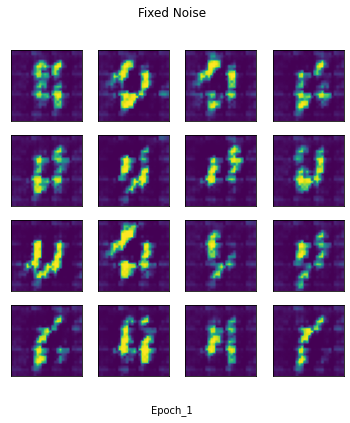

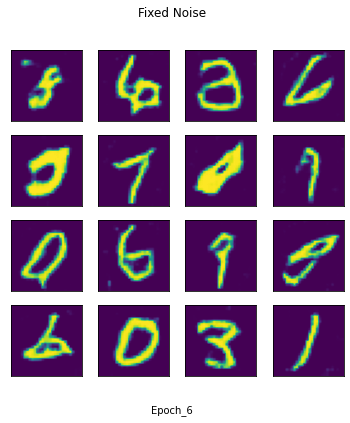

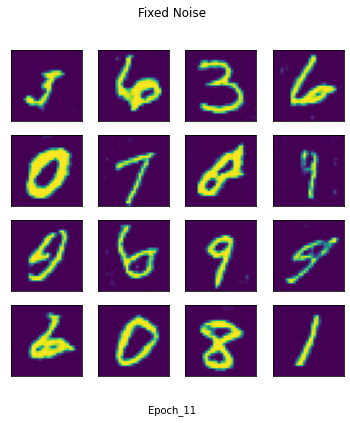

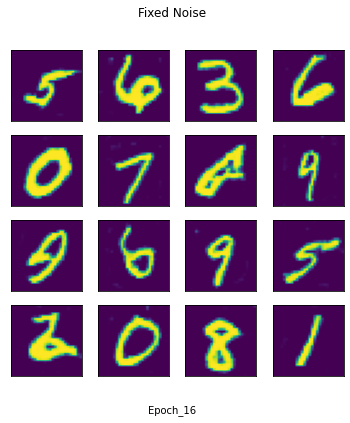

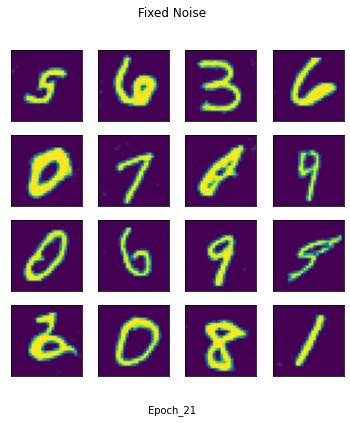

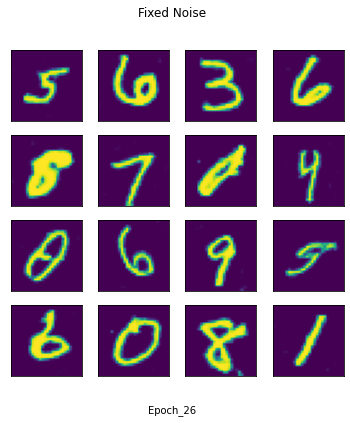

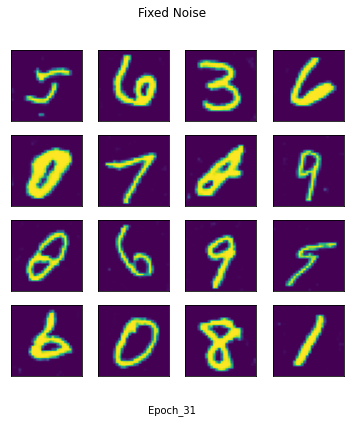

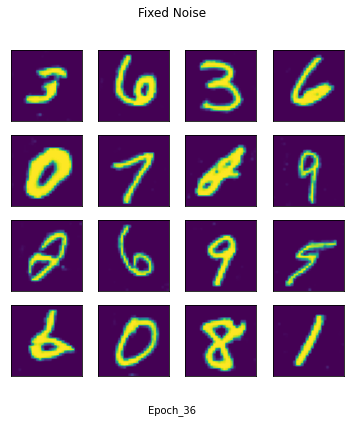

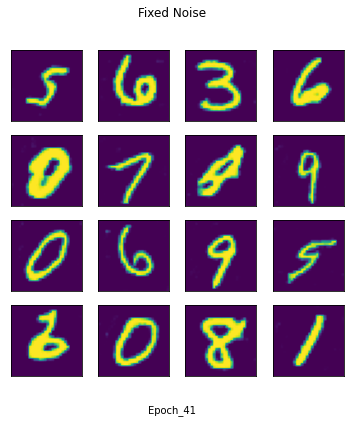

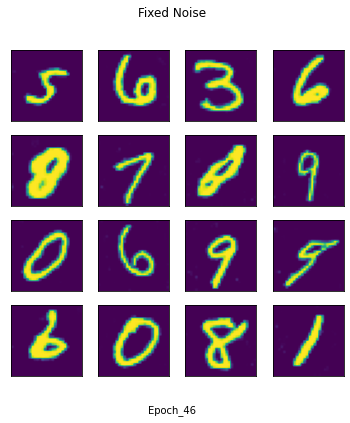

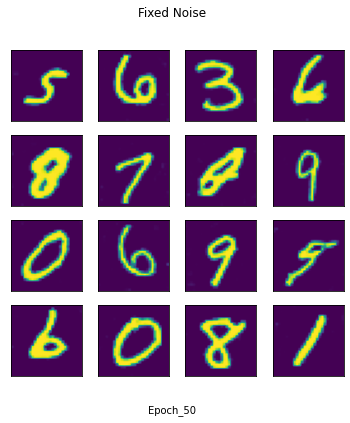

In [9]:
from torch.utils.tensorboard import SummaryWriter

netG = Generator().to(device)
netG.apply(weights_init)
netD = Discriminator().to(device)
netD.apply(weights_init)


# Setup Adam optimizers for both G and D
opt_D = torch.optim.Adam(netD.parameters(), lr=0.0002)
opt_G = torch.optim.Adam(netG.parameters(), lr=0.0002)
fixed_noise = torch.randn(16, 100, 1, 1, device=device)
max_epochs=50
writer = SummaryWriter()
save_path="./model/"
if not os.path.exists(save_path):
    os.makedirs(save_path)

for i in range(max_epochs):
    train(i,data_loader,netG,netD,opt_D,opt_G,writer,device,max_epochs)
    if i%5==0:
      generate_images(i, "./Test", fixed_noise, 16, netG, device,True)
    
  
generate_images(i, "./Test", fixed_noise, 16, netG, device)
torch.save(netG.state_dict(),"./model/epoch"+str(i)+"_g.txt")
torch.save(netD.state_dict(),"./model/epoch"+str(i)+"_d.txt")
  

In [ ]:
import os

!zip -r file.zip '/kaggle/working'